In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
House_df = pd.read_csv('House_Rent.csv')
shuffled = House_df.sample(frac=1,random_state=32) 
testing = shuffled.tail(1000)
training = shuffled.drop(testing.index)
training

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3190,2022-06-18,1,5000,350,Ground out of 1,Super Area,Kolathur,Chennai,Unfurnished,Bachelors/Family,1,Contact Owner
1713,2022-07-06,3,35000,1800,1 out of 1,Super Area,whitefield,Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Agent
3311,2022-07-06,2,10000,778,4 out of 4,Super Area,Sholinganallur,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
1308,2022-06-29,2,51000,910,10 out of 19,Carpet Area,"Rivali Park, Borivali East",Mumbai,Unfurnished,Bachelors,2,Contact Agent
2550,2022-07-09,2,36000,1440,2 out of 3,Carpet Area,Chittaranjan Park,Delhi,Semi-Furnished,Bachelors,2,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
1212,2022-06-18,2,80000,750,6 out of 16,Carpet Area,"lokhandwala residency, Worli",Mumbai,Furnished,Bachelors,2,Contact Agent
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
407,2022-06-27,1,5500,400,Ground out of 1,Super Area,"Shyam Villa V, Dum Dum",Kolkata,Unfurnished,Bachelors/Family,1,Contact Agent
597,2022-07-09,2,47000,751,3 out of 30,Carpet Area,"Kalpataru Towers, Akurli Nagar",Mumbai,Semi-Furnished,Family,2,Contact Agent


In [3]:
p = lambda x : x/100
print(int(len(training)*p(20)))

749


In [4]:
validation_train = training.tail(int(len(training)*p(20)))
validation_train

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3590,2022-05-19,2,13000,730,2 out of 2,Carpet Area,Keelkattalai,Chennai,Semi-Furnished,Family,2,Contact Owner
2129,2022-05-05,3,20000,1200,Ground out of 2,Super Area,Basaveshwar Nagar,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
3621,2022-06-02,1,12500,600,2 out of 4,Super Area,Arumbakkam,Chennai,Furnished,Bachelors/Family,1,Contact Owner
887,2022-07-06,1,32000,400,3 out of 7,Carpet Area,"Trans Residency, Andheri East",Mumbai,Furnished,Bachelors/Family,1,Contact Agent
495,2022-06-27,2,12000,1000,Ground out of 2,Super Area,"Picnic Garden, Tiljala",Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
1212,2022-06-18,2,80000,750,6 out of 16,Carpet Area,"lokhandwala residency, Worli",Mumbai,Furnished,Bachelors,2,Contact Agent
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
407,2022-06-27,1,5500,400,Ground out of 1,Super Area,"Shyam Villa V, Dum Dum",Kolkata,Unfurnished,Bachelors/Family,1,Contact Agent
597,2022-07-09,2,47000,751,3 out of 30,Carpet Area,"Kalpataru Towers, Akurli Nagar",Mumbai,Semi-Furnished,Family,2,Contact Agent


In [5]:
train = training.drop(validation_train.index)
train

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3190,2022-06-18,1,5000,350,Ground out of 1,Super Area,Kolathur,Chennai,Unfurnished,Bachelors/Family,1,Contact Owner
1713,2022-07-06,3,35000,1800,1 out of 1,Super Area,whitefield,Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Agent
3311,2022-07-06,2,10000,778,4 out of 4,Super Area,Sholinganallur,Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
1308,2022-06-29,2,51000,910,10 out of 19,Carpet Area,"Rivali Park, Borivali East",Mumbai,Unfurnished,Bachelors,2,Contact Agent
2550,2022-07-09,2,36000,1440,2 out of 3,Carpet Area,Chittaranjan Park,Delhi,Semi-Furnished,Bachelors,2,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...,...
3771,2022-05-17,2,22000,1000,2 out of 4,Carpet Area,T Nagar,Chennai,Semi-Furnished,Bachelors/Family,2,Contact Agent
4101,2022-05-25,2,11000,950,2 out of 3,Carpet Area,IDA Uppal,Hyderabad,Unfurnished,Bachelors,2,Contact Owner
3528,2022-05-06,2,10000,960,1 out of 2,Super Area,"Chromepet, GST Road",Chennai,Unfurnished,Bachelors/Family,2,Contact Owner
2000,2022-05-19,3,15000,800,Ground out of 3,Super Area,Kithiganur,Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Owner


number of rows in training, validation and test sets, along with the structure, datatypes and value counts of the dataframes.

In [6]:
print(train.dtypes)
print("The number of rows are :",len(train),", The number of columns are :",len(train.columns))

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object
The number of rows are : 2997 , The number of columns are : 12


# Data Cleaning:

In [7]:
training = train.drop(['Posted On','Floor','Area Locality','Tenant Preferred'],axis=1)
training

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact
3190,1,5000,350,Super Area,Chennai,Unfurnished,1,Contact Owner
1713,3,35000,1800,Super Area,Bangalore,Semi-Furnished,3,Contact Agent
3311,2,10000,778,Super Area,Chennai,Unfurnished,2,Contact Owner
1308,2,51000,910,Carpet Area,Mumbai,Unfurnished,2,Contact Agent
2550,2,36000,1440,Carpet Area,Delhi,Semi-Furnished,2,Contact Agent
...,...,...,...,...,...,...,...,...
3771,2,22000,1000,Carpet Area,Chennai,Semi-Furnished,2,Contact Agent
4101,2,11000,950,Carpet Area,Hyderabad,Unfurnished,2,Contact Owner
3528,2,10000,960,Super Area,Chennai,Unfurnished,2,Contact Owner
2000,3,15000,800,Super Area,Bangalore,Semi-Furnished,3,Contact Owner


Check for missing values and logically impute the dataset.

In [8]:
print("naValues:")
print(training.isna().sum(),"\n")
print("nullValues:")
print(training.isnull().sum(),'\n')

naValues:
BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Bathroom             0
Point of Contact     0
dtype: int64 

nullValues:
BHK                  0
Rent                 0
Size                 0
Area Type            0
City                 0
Furnishing Status    0
Bathroom             0
Point of Contact     0
dtype: int64 



Identify any categorical valued columns (non-numeric) and convert them to numeric.

In [9]:
training["Furnishing Status"]=pd.factorize(training["Furnishing Status"])[0]
training["Area Type"]=pd.factorize(training["Area Type"])[0]
training["Point of Contact"]=pd.factorize(training["Point of Contact"])[0]
training

,BHK,Rent,Size,Area Type,City,Furnishing Status,Bathroom,Point of Contact
3190,1,5000,350,0,Chennai,0,1,0
1713,3,35000,1800,0,Bangalore,1,3,1
3311,2,10000,778,0,Chennai,0,2,0
1308,2,51000,910,1,Mumbai,0,2,1
2550,2,36000,1440,1,Delhi,1,2,1
...,...,...,...,...,...,...,...,...
3771,2,22000,1000,1,Chennai,1,2,1
4101,2,11000,950,1,Hyderabad,0,2,0
3528,2,10000,960,0,Chennai,0,2,0
2000,3,15000,800,0,Bangalore,1,3,0


## Exploratory Analysis :

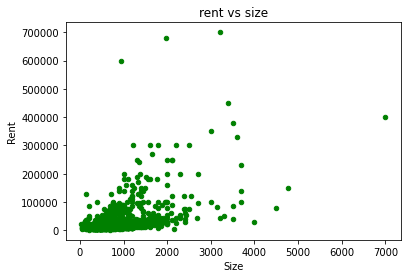

In [10]:
df=training[['Size','Rent']]
df=df.tail(1000)
df.plot(kind='scatter',x='Size',y='Rent',color='green')
plt.title('rent vs size')
plt.show()

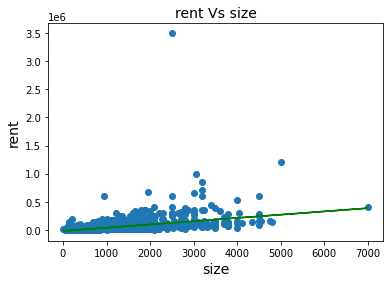

In [11]:
X = training.iloc[:, 2].values.reshape(-1, 1)  
Y = training.iloc[:, 1].values.reshape(-1, 1)  
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X)  
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='green')
plt.title('rent Vs size', fontsize=14)
plt.xlabel('size', fontsize=14)
plt.ylabel('rent', fontsize=14)
plt.show()

Find average rent prices in different cities and report which city has the highest average rent.

In [12]:
df1 = training[['Rent','City']]
df_g=df1.groupby(["City"],sort=True)['Rent'].mean()
print(df_g,'\n')
city_dict ={}
city_dict.update(df_g)
for key, value in city_dict.items():
    if(value == df_g.max()):
        print(key,"city has the highest average rent with: ",value)

City
Bangalore    27542.725490
Chennai      21757.683761
Delhi        28864.766839
Hyderabad    21325.120818
Kolkata      10996.353116
Mumbai       89888.984746
Name: Rent, dtype: float64 

Mumbai city has the highest average rent with:  89888.98474576272


# Regression:

Train a linear regression model on the training set partition by taking only one dependent variable of
“size”. Calculate the error on the validation set.

In [13]:
train_consist = training[['BHK','Rent','Bathroom']]
model = LinearRegression()
model.fit(train_consist,training['Size'])

LinearRegression()

In [14]:
test_pred = model.predict(validation_train[['BHK','Rent','Bathroom']])
df_pred = pd.DataFrame(data=test_pred,columns=["Predicted Size"])
df_pred

,Predicted Size
0,941.471272
1,1228.687767
2,372.722136
3,388.753878
4,940.649131
...,...
744,996.554693
745,660.349702
746,366.967152
747,969.424053


In [15]:
df2 = training[['Size']].head(1500)
df2

,Size
3190,350
1713,1800
3311,778
1308,910
2550,1440
...,...
1223,669
547,850
2463,380
3490,786


In [16]:
df2_value=df2.index.values
df_value=df_pred.index.values

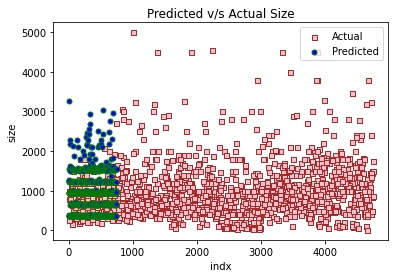

In [17]:
plt.scatter(y=df2['Size'],x=df2_value,c="pink",linewidths=1,marker="s",edgecolor="brown",s=25)
plt.scatter(y=df_pred['Predicted Size'],x=df_value,c="blue",linewidths=1,marker=".",edgecolor="green",s=100)
plt.title("Predicted v/s Actual Size")
plt.legend(['Actual','Predicted'])
plt.xlabel("indx")
plt.ylabel("size")
plt.show()

In [18]:
mse = mean_squared_error(validation_train['Size'],test_pred)
rmse = np.sqrt(mse)
print(rmse)

421.6488778725283


Plot the model predictions of rent values alongside the actual rent values taken for the validation set.
Show the legend, axes and color-coded predictions and ground truth for differentiating.

In [19]:
train_1 = training[['BHK','Size','Bathroom']]
train_1

,BHK,Size,Bathroom
3190,1,350,1
1713,3,1800,3
3311,2,778,2
1308,2,910,2
2550,2,1440,2
...,...,...,...
3771,2,1000,2
4101,2,950,2
3528,2,960,2
2000,3,800,3


In [20]:
model = LinearRegression().fit(train_1,training['Rent'])

In [21]:
test_pred = model.predict(validation_train[['BHK','Size','Bathroom']])
df_pred = pd.DataFrame(data=test_pred,columns=["Predicted Rent"])
df_pred

,Predicted Rent
0,29099.905586
1,40089.395951
2,1742.171121
3,-5057.394065
4,38279.318588
...,...
744,29779.862105
745,3552.248484
746,-5057.394065
747,29813.859931


In [22]:
df3=training[['Rent']].head(1500)
df3

,Rent
3190,5000
1713,35000
3311,10000
1308,51000
2550,36000
...,...
1223,46000
547,100000
2463,5500
3490,13000


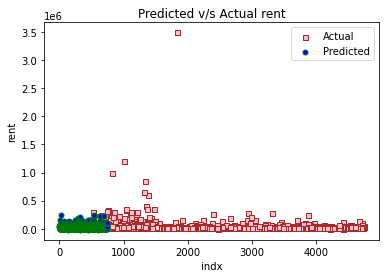

In [23]:
plt.scatter(y=df3['Rent'],x=df2_value,c="pink",linewidths=1,marker="s",edgecolor="brown",s=25)
plt.scatter(y=df_pred['Predicted Rent'],x=df_value,c="blue",linewidths=1,marker=".",edgecolor="green",s=100)
plt.title("Predicted v/s Actual rent")
plt.legend(['Actual','Predicted'])
plt.xlabel("indx")
plt.ylabel("rent")
plt.show()

In [24]:
mae = mean_absolute_error(validation_train['Rent'],test_pred)
mse = mean_squared_error(validation_train['Rent'],test_pred)
rmse = np.sqrt(mse)
print("RMSE: ",rmse)

RMSE:  42729.54052455503


In [25]:
validation_t = validation_train[['BHK','Size','Bathroom']]
validation_t

,BHK,Size,Bathroom
3590,2,730,2
2129,3,1200,2
3621,1,600,1
887,1,400,1
495,2,1000,2
...,...,...,...
1212,2,750,2
1,2,800,1
407,1,400,1
597,2,751,2


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [27]:
modelL = LogisticRegression(max_iter=20,solver='liblinear')
modelL.fit(validation_t,validation_train['Rent'])
modelL

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(max_iter=20, solver='liblinear')

In [32]:
scaler = StandardScaler()
scale_train= scaler.fit_transform(train_consist)
scale_test = scaler.transform(testing[['BHK','Rent','Bathroom']])

In [34]:
modelL = LogisticRegression()
modelL.fit(scale_train,training['Size'])

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
Lp=modelL.predict(scale_test)
Lp

array([1000, 1000, 1000, 1200, 2000,  600, 1000,  950,  400, 1800, 1500,
       1500, 1000, 1800,  400, 1500,  600,  400, 1000,  450,  400, 1000,
       1000, 1500, 1000,  400, 1200, 1200, 1000, 1200,  400,  400, 1000,
       1800, 2500, 1500,  700,  600, 1200,  400,  450, 1000, 1200, 1800,
        400, 1500, 1000,  400, 1000, 1500, 1000, 1000,  400,  400, 1000,
       1200, 2000, 1200,  400,  600,  400, 2000, 1500, 1000,  400,  400,
       1000, 1000, 1000, 1500, 1000, 1000,  600,  600, 1500, 1000,  400,
        400,  400, 1800, 1000, 1000, 1000, 3000,  400,  600, 1200,  600,
       1500, 1000, 1000, 1000,  700,  600, 3000, 1000, 1000,  600,  400,
        700, 1000,  400,  600, 1000, 1500, 1500,  450,  600, 1000, 1000,
       1000, 1000, 1000, 1000, 1330,  600, 1000, 1200, 1000, 1000, 1000,
       1000, 1000, 1000, 1000,  400,  400, 3000, 1800,  400,  400,  400,
       1000,  600,  400, 1000, 1000, 1000, 1000,  400, 1000,  600, 1000,
       1000, 1000, 1000,  450, 1000, 1000, 1000,  4

Try to improve accuracy (on validation set) by considering more features and retraining.

In [36]:
modelL.score(scale_train,training['Size'])

0.0960960960960961